In [2]:
%pwd

'/home/xupb/scRNA_data/mouse_pfc/manuscripts/scanpy'

In [3]:
#Run the below code in your notebook to check the installed version
import pandas as pd
from pycaret.utils import version
version()
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import column_or_1d
import shap
import matplotlib.pyplot as plt
import random
from pycaret.classification import *
%matplotlib inline

1.0.0


In [4]:
data=pd.read_csv('/home/xupb/scRNA_data/mouse_pfc/manuscripts/barcode_projection/var150_AI_valid_binary_normdata.csv',index_col=0)

In [5]:
data['binary'].value_counts()

Others      3029
AI_valid     527
Name: binary, dtype: int64

In [6]:
data.head()

,Npy,Ptgs2,Pbld1,Gm13889,Cplx3,Tshz2,Cyr61,Lypd1,Nr4a2,Dlk1,Pou3f1,Rprm,Etv1,Nnat,Arl4d,Synpr,Myl4,Adamts1,Marcksl1,Hspa1a,Gadd45b,S100a6,Gm10635,Stxbp6,Gadd45g,Egr4,Aldh1a3,Scg2,Bdnf,Igfbp4,Rxfp1,Btg2,Ctgf,Ighm,Defb1,Hs3st4,Cck,Pdyn,Rab3c,Rorb,Ptn,Gpr88,Gm40518,Hspa8,Cux2,Ddah1,Dnajb1,Gm15124,Rgs5,Bc1,Calb1,Npas4,Nos1,Tubb2a,Sox4,Junb,Sema5a,Deptor,Grp,Sox9,Nptx2,Cenpf,Gm29666,C1ql3,Fos,Pcp4,Tnnc1,Sgk1,Nefm,Tuba1a,Ndn,Dcn,Nptxr,Gapdh,Cplx2,Egr2,Dusp1,Ccnb1,Nxph3,Ubb,Olfr889,Neat1,Rcan2,Foxp2,Fam19a1,Nrn1,Alcam,Tiparp,Loxl2,Rgs4,Crym,Gm26710,Ier2,Nrip3,Defb42,Lamp5,S100b,Serpine2,Lpl,Cartpt,Ntng1,Plcb4,Cnr1,AC160336.1,Gad2,Olfr1369-ps1,Oprk1,Nfia,Tac2,Nr4a1,Hsp90ab1,Cbln2,Gm10827,Gm45184,Cryab,Slc24a3,Rab3b,Slc1a2,Hist1h4i,Cxcl14,Syt6,Igfbp6,Pitpnc1,Ifit1,Slc24a2,Arc,Camk2d,Nr4a3,Crh,Gm45833,Gm26772,Ccdc3,Krt80,Timp2,Lmo1,Fosb,Hspa1b,Tle4,Tnfaip6,Hist1h2ac,Fam3c,Rora,Cdh13,Rnf152,Cdkn1c,Cxcl12,Thsd7a,Ldhb,Grin3a,Bcl11b,binary
pfc_1_AAACCCAAGTCGTTAC,0.0,0.000000,0.0,1.147602,0.0,0.0,0.000000,0.000000,1.147602,0.0,0.00000,1.147602,1.147602,0.000000,0.0,2.901699,0.000000,0.0,1.667945,0.000000,2.464121,0.000000,0.0,0.000000,1.667945,3.963004,0.00000,1.147602,2.464121,0.000000,2.464121,2.464121,0.0,0.0,0.0,0.000000,4.931883,0.0,2.632161,2.008468,0.000000,0.0,0.0,3.205058,1.667945,0.0,1.147602,0.0,1.147602,2.901699,0.00000,2.901699,0.000000,2.464121,1.147602,4.667026,0.00000,2.464121,1.147602,2.464121,0.000000,0.0,0.0,3.921270,4.334307,2.464121,0.000000,1.667945,2.008468,3.288684,2.008468,0.0,3.113795,3.504339,0.000000,1.667945,2.262026,0.000000,1.667945,4.214636,0.0,0.0,1.147602,0.0,2.632161,3.832184,1.147602,1.147602,0.0,3.963004,1.147602,0.0,3.365853,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,2.008468,0.000000,3.437491,1.667945,0.0,0.0,0.0,0.000000,0.0,2.775984,3.437491,0.000000,2.464121,0.0,0.000000,2.008468,1.667945,3.437491,0.0,0.0,0.0,1.667945,0.000000,0.0,0.000000,2.632161,2.632161,3.113795,0.0,0.000000,0.0,1.147602,0.0,3.013360,0.000000,1.667945,1.667945,2.008468,0.0,0.000000,0.000000,2.262026,0.000000,0.0,2.901699,0.000000,0.0,1.667945,1.147602,1.147602,AI_valid
pfc_1_AAAGGGCGTGGCATCC,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,2.804003,3.123019,0.0,0.000000,1.411504,0.0,0.000000,1.411504,0.000000,0.000000,0.0,0.000000,2.804003,1.974670,0.00000,0.000000,0.000000,0.000000,1.974670,1.411504,0.0,0.0,0.0,0.000000,5.678805,0.0,2.332762,0.000000,0.000000,0.0,0.0,3.721530,0.000000,0.0,1.411504,0.0,0.000000,2.804003,0.00000,0.000000,0.000000,3.251032,0.000000,4.093349,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,4.323482,2.976179,0.000000,0.000000,0.000000,0.000000,3.558866,2.595888,0.0,3.364502,4.323482,0.000000,0.000000,0.000000,0.000000,0.000000,4.751679,0.0,0.0,0.000000,0.0,0.000000,3.861400,1.974670,0.000000,0.0,0.000000,0.000000,0.0,1.974670,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,2.332762,0.000000,3.251032,0.000000,0.0,0.0,0.0,0.000000,0.0,1.974670,3.793908,0.000000,0.000000,0.0,0.000000,1.411504,1.974670,2.595888,0.0,0.0,0.0,2.332762,0.000000,0.0,1.411504,0.000000,1.411504,1.974670,0.0,0.000000,0.0,0.000000,0.0,2.804003,0.000000,2.332762,0.000000,0.000000,0.0,2.595888,0.000000,0.000000,3.364502,0.0,0.000000,0.000000,0.0,2.595888,1.411504,1.411504,AI_valid
pfc_1_AACCCAATCCGCTTAC,0.0,1.034382,0.0,0.000000,0.0,0.0,1.034382,0.000000,0.000000,0.0,0.00000,1.034382,1.034382,0.000000,0.0,1.034382,0.000000,0.0,0.000000,1.034382,0.000000,0.000000,0.0,0.000000,1.034382,1.531852,0.00000,1.862545,2.110634,2.110634,0.000000,1.034382,0.0,0.0,0.0,1.034382,5.318597,0.0,1.531852,2.110634,2.741288,0.0,0.0,3.125023,0.000000,0.0,1.862545,0.0,0.000000,2.309247,0.00000,2.474874,0.000000,1.034382,1.034382,2.616927,0.00000,0.000000,0.000000,0.000000,1.034382,0.0,0.0,3.339340,2.474874,4.220898,3.125023,0.000000,1.034382,2.951450,2.309247,0.0,3.339340,3.041998,2.309247,0.000000,1.531852,2.309247,0.000000,3.515734,0.0,0.0,2.616927,0.0,0.000000,4.108266,2.110634,0.000000,0.0,3.981319,0.000000,0.0,2.474874,0.000000

In [7]:
df=shuffle(data,random_state=20)
df.head()

,Npy,Ptgs2,Pbld1,Gm13889,Cplx3,Tshz2,Cyr61,Lypd1,Nr4a2,Dlk1,Pou3f1,Rprm,Etv1,Nnat,Arl4d,Synpr,Myl4,Adamts1,Marcksl1,Hspa1a,Gadd45b,S100a6,Gm10635,Stxbp6,Gadd45g,Egr4,Aldh1a3,Scg2,Bdnf,Igfbp4,Rxfp1,Btg2,Ctgf,Ighm,Defb1,Hs3st4,Cck,Pdyn,Rab3c,Rorb,Ptn,Gpr88,Gm40518,Hspa8,Cux2,Ddah1,Dnajb1,Gm15124,Rgs5,Bc1,Calb1,Npas4,Nos1,Tubb2a,Sox4,Junb,Sema5a,Deptor,Grp,Sox9,Nptx2,Cenpf,Gm29666,C1ql3,Fos,Pcp4,Tnnc1,Sgk1,Nefm,Tuba1a,Ndn,Dcn,Nptxr,Gapdh,Cplx2,Egr2,Dusp1,Ccnb1,Nxph3,Ubb,Olfr889,Neat1,Rcan2,Foxp2,Fam19a1,Nrn1,Alcam,Tiparp,Loxl2,Rgs4,Crym,Gm26710,Ier2,Nrip3,Defb42,Lamp5,S100b,Serpine2,Lpl,Cartpt,Ntng1,Plcb4,Cnr1,AC160336.1,Gad2,Olfr1369-ps1,Oprk1,Nfia,Tac2,Nr4a1,Hsp90ab1,Cbln2,Gm10827,Gm45184,Cryab,Slc24a3,Rab3b,Slc1a2,Hist1h4i,Cxcl14,Syt6,Igfbp6,Pitpnc1,Ifit1,Slc24a2,Arc,Camk2d,Nr4a3,Crh,Gm45833,Gm26772,Ccdc3,Krt80,Timp2,Lmo1,Fosb,Hspa1b,Tle4,Tnfaip6,Hist1h2ac,Fam3c,Rora,Cdh13,Rnf152,Cdkn1c,Cxcl12,Thsd7a,Ldhb,Grin3a,Bcl11b,binary
pfc_2_GACCGTGTCATGTCTT,0.0,0.0,0.000000,0.975321,0.0,0.000000,0.000000,1.459554,0.975321,0.0,3.24961,0.000000,1.784409,0.000000,0.000000,0.000000,0.0,0.00000,2.029210,0.000000,0.000000,1.459554,0.0,3.311721,0.975321,0.000000,0.0,0.000000,1.459554,2.225714,0.000000,0.975321,0.000000,0.00000,0.0,0.000000,3.249610,1.459554,3.986474,0.000000,3.112459,0.000000,0.000000,3.783109,0.0,0.000000,0.975321,0.0,0.000000,2.389873,0.0,0.000000,0.000000,3.183384,0.000000,0.975321,0.000000,0.000000,2.654379,1.459554,0.000000,0.0,0.000000,3.183384,2.029210,2.764315,0.0,0.000000,2.225714,2.953462,2.953462,0.0,2.764315,3.311721,0.000000,0.000000,0.975321,0.000000,0.000000,4.253977,0.0,0.00000,0.000000,0.000000,3.112459,2.029210,1.784409,0.000000,0.0,3.183384,3.311721,0.0,1.459554,2.530846,0.0,1.459554,0.975321,2.654379,0.0,0.0,1.784409,2.225714,2.029210,0.000000,0.0,0.0,0.0,0.000000,0.0,0.975321,4.074493,0.0,0.975321,0.000000,0.000000,0.000000,0.000000,1.459554,0.000000,0.0,0.000000,2.029210,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.029210,0.0,3.249610,2.029210,0.000000,0.000000,0.000000,0.0,2.225714,0.000000,2.029210,2.953462,0.0,0.0,3.477799,0.000000,2.029210,0.975321,2.654379,Others
pfc_3_CTACAGAGTAGGAGTC,0.0,0.0,0.000000,4.237145,0.0,0.000000,2.864242,1.974207,1.120690,0.0,0.00000,4.039680,1.120690,2.864242,3.587358,0.000000,0.0,1.12069,0.000000,2.864242,3.399114,0.000000,0.0,0.000000,4.521209,4.498472,0.0,1.635873,0.000000,0.000000,0.000000,3.838879,2.427882,0.00000,0.0,2.595390,0.000000,0.000000,1.635873,0.000000,0.000000,0.000000,0.000000,5.274512,0.0,1.635873,3.964127,0.0,0.000000,2.226555,0.0,2.864242,0.000000,4.175557,2.738824,5.231255,1.120690,0.000000,0.000000,0.000000,2.738824,0.0,0.000000,1.120690,4.543440,4.860991,0.0,3.250515,2.427882,4.844857,4.109925,0.0,1.120690,5.263872,1.974207,2.738824,4.075419,0.000000,2.226555,5.612544,0.0,1.12069,1.974207,2.595390,0.000000,0.000000,1.120690,0.000000,0.0,2.738824,3.838879,0.0,3.695667,2.738824,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.120690,0.000000,1.974207,0.0,0.0,0.0,1.120690,0.0,2.864242,5.023149,0.0,0.000000,0.000000,1.974207,0.000000,2.738824,2.975669,0.000000,0.0,1.974207,0.000000,1.120690,0.0,1.120690,3.964127,0.000000,2.738824,0.0,0.000000,0.0,0.000000,0.0,2.427882,2.226555,3.642978,0.000000,1.120690,0.0,0.000000,1.635873,1.635873,2.864242,0.0,0.0,2.427882,0.000000,3.587358,0.000000,0.000000,Others
pfc_4_GGTTAACAGAGAGGTA,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.890337,1.767631,0.000000,0.0,0.00000,4.161076,0.794910,2.575844,2.478902,0.000000,0.0,0.00000,0.000000,3.744413,1.767631,0.000000,0.0,0.000000,3.321912,3.180990,0.0,0.794910,0.000000,0.000000,0.000000,2.955619,1.232117,0.79491,0.0,3.483399,0.000000,0.000000,1.535301,0.000000,1.232117,0.000000,2.251259,4.855892,0.0,2.890337,1.232117,0.0,0.000000,3.827051,0.0,3.016899,0.000000,4.040505,0.000000,3.878578,2.371544,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.794910,4.141964,4.396175,0.0,1.767631,1.232117,4.082332,4.216315,0.0,0.794910,4.161076,2.820493,0.000000,1.95

In [8]:
df['binary']=pd.factorize(df['binary'])[0]

In [9]:
df.to_csv('var150_AI_valid_binary_normdata_shuffle.csv')

In [10]:
df=pd.read_csv('var150_AI_valid_binary_normdata_shuffle.csv',index_col=0)

In [11]:
df.head()

,Npy,Ptgs2,Pbld1,Gm13889,Cplx3,Tshz2,Cyr61,Lypd1,Nr4a2,Dlk1,Pou3f1,Rprm,Etv1,Nnat,Arl4d,Synpr,Myl4,Adamts1,Marcksl1,Hspa1a,Gadd45b,S100a6,Gm10635,Stxbp6,Gadd45g,Egr4,Aldh1a3,Scg2,Bdnf,Igfbp4,Rxfp1,Btg2,Ctgf,Ighm,Defb1,Hs3st4,Cck,Pdyn,Rab3c,Rorb,Ptn,Gpr88,Gm40518,Hspa8,Cux2,Ddah1,Dnajb1,Gm15124,Rgs5,Bc1,Calb1,Npas4,Nos1,Tubb2a,Sox4,Junb,Sema5a,Deptor,Grp,Sox9,Nptx2,Cenpf,Gm29666,C1ql3,Fos,Pcp4,Tnnc1,Sgk1,Nefm,Tuba1a,Ndn,Dcn,Nptxr,Gapdh,Cplx2,Egr2,Dusp1,Ccnb1,Nxph3,Ubb,Olfr889,Neat1,Rcan2,Foxp2,Fam19a1,Nrn1,Alcam,Tiparp,Loxl2,Rgs4,Crym,Gm26710,Ier2,Nrip3,Defb42,Lamp5,S100b,Serpine2,Lpl,Cartpt,Ntng1,Plcb4,Cnr1,AC160336.1,Gad2,Olfr1369-ps1,Oprk1,Nfia,Tac2,Nr4a1,Hsp90ab1,Cbln2,Gm10827,Gm45184,Cryab,Slc24a3,Rab3b,Slc1a2,Hist1h4i,Cxcl14,Syt6,Igfbp6,Pitpnc1,Ifit1,Slc24a2,Arc,Camk2d,Nr4a3,Crh,Gm45833,Gm26772,Ccdc3,Krt80,Timp2,Lmo1,Fosb,Hspa1b,Tle4,Tnfaip6,Hist1h2ac,Fam3c,Rora,Cdh13,Rnf152,Cdkn1c,Cxcl12,Thsd7a,Ldhb,Grin3a,Bcl11b,binary
pfc_2_GACCGTGTCATGTCTT,0.0,0.0,0.000000,0.975321,0.0,0.000000,0.000000,1.459554,0.975321,0.0,3.24961,0.000000,1.784409,0.000000,0.000000,0.000000,0.0,0.00000,2.029210,0.000000,0.000000,1.459554,0.0,3.311721,0.975321,0.000000,0.0,0.000000,1.459554,2.225714,0.000000,0.975321,0.000000,0.00000,0.0,0.000000,3.249610,1.459554,3.986474,0.000000,3.112459,0.000000,0.000000,3.783109,0.0,0.000000,0.975321,0.0,0.000000,2.389873,0.0,0.000000,0.000000,3.183384,0.000000,0.975321,0.000000,0.000000,2.654379,1.459554,0.000000,0.0,0.000000,3.183384,2.029210,2.764315,0.0,0.000000,2.225714,2.953462,2.953462,0.0,2.764315,3.311721,0.000000,0.000000,0.975321,0.000000,0.000000,4.253977,0.0,0.00000,0.000000,0.000000,3.112459,2.029210,1.784409,0.000000,0.0,3.183384,3.311721,0.0,1.459554,2.530846,0.0,1.459554,0.975321,2.654379,0.0,0.0,1.784409,2.225714,2.029210,0.000000,0.0,0.0,0.0,0.000000,0.0,0.975321,4.074493,0.0,0.975321,0.000000,0.000000,0.000000,0.000000,1.459554,0.000000,0.0,0.000000,2.029210,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.029210,0.0,3.249610,2.029210,0.000000,0.000000,0.000000,0.0,2.225714,0.000000,2.029210,2.953462,0.0,0.0,3.477799,0.000000,2.029210,0.975321,2.654379,0
pfc_3_CTACAGAGTAGGAGTC,0.0,0.0,0.000000,4.237145,0.0,0.000000,2.864242,1.974207,1.120690,0.0,0.00000,4.039680,1.120690,2.864242,3.587358,0.000000,0.0,1.12069,0.000000,2.864242,3.399114,0.000000,0.0,0.000000,4.521209,4.498472,0.0,1.635873,0.000000,0.000000,0.000000,3.838879,2.427882,0.00000,0.0,2.595390,0.000000,0.000000,1.635873,0.000000,0.000000,0.000000,0.000000,5.274512,0.0,1.635873,3.964127,0.0,0.000000,2.226555,0.0,2.864242,0.000000,4.175557,2.738824,5.231255,1.120690,0.000000,0.000000,0.000000,2.738824,0.0,0.000000,1.120690,4.543440,4.860991,0.0,3.250515,2.427882,4.844857,4.109925,0.0,1.120690,5.263872,1.974207,2.738824,4.075419,0.000000,2.226555,5.612544,0.0,1.12069,1.974207,2.595390,0.000000,0.000000,1.120690,0.000000,0.0,2.738824,3.838879,0.0,3.695667,2.738824,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.120690,0.000000,1.974207,0.0,0.0,0.0,1.120690,0.0,2.864242,5.023149,0.0,0.000000,0.000000,1.974207,0.000000,2.738824,2.975669,0.000000,0.0,1.974207,0.000000,1.120690,0.0,1.120690,3.964127,0.000000,2.738824,0.0,0.000000,0.0,0.000000,0.0,2.427882,2.226555,3.642978,0.000000,1.120690,0.0,0.000000,1.635873,1.635873,2.864242,0.0,0.0,2.427882,0.000000,3.587358,0.000000,0.000000,0
pfc_4_GGTTAACAGAGAGGTA,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.890337,1.767631,0.000000,0.0,0.00000,4.161076,0.794910,2.575844,2.478902,0.000000,0.0,0.00000,0.000000,3.744413,1.767631,0.000000,0.0,0.000000,3.321912,3.180990,0.0,0.794910,0.000000,0.000000,0.000000,2.955619,1.232117,0.79491,0.0,3.483399,0.000000,0.000000,1.535301,0.000000,1.232117,0.000000,2.251259,4.855892,0.0,2.890337,1.232117,0.0,0.000000,3.827051,0.0,3.016899,0.000000,4.040505,0.000000,3.878578,2.371544,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.794910,4.141964,4.396175,0.0,1.767631,1.232117,4.082332,4.216315,0.0,0.794910,4.161076,2.820493,0.000000,1.956031,0.000

In [12]:
exp1 = setup(df, target = 'binary',session_id=1)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(3556, 151)"
4,Missing Values,False
5,Numeric Features,150
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
tuned_xgboost = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8916,0.8805,0.4324,0.7273,0.5424,0.4853
1,0.8434,0.8668,0.1622,0.4286,0.2353,0.1674
2,0.8755,0.8895,0.4324,0.6154,0.5079,0.4391
3,0.8233,0.8237,0.1081,0.2667,0.1538,0.0745
4,0.8715,0.8779,0.3784,0.6087,0.4667,0.3981
5,0.8474,0.8118,0.2432,0.4737,0.3214,0.2453
6,0.8353,0.7933,0.1892,0.3889,0.2545,0.1742
7,0.8715,0.8962,0.3514,0.6190,0.4483,0.3818
8,0.8474,0.8204,0.4054,0.4839,0.4412,0.3536
9,0.8468,0.8522,0.3889,0.4667,0.4242,0.3367


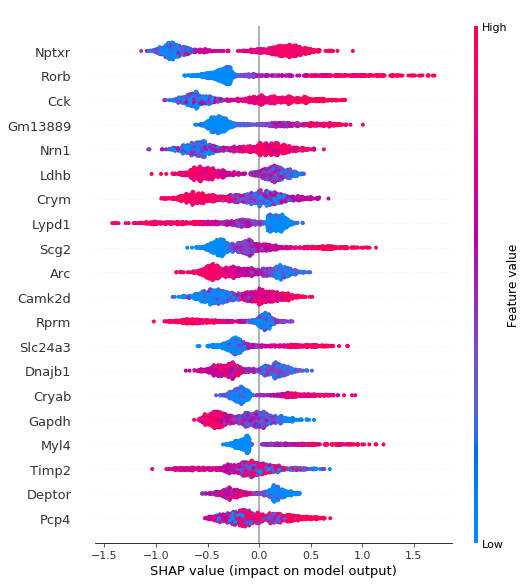

In [14]:
interpret_model(tuned_xgboost)

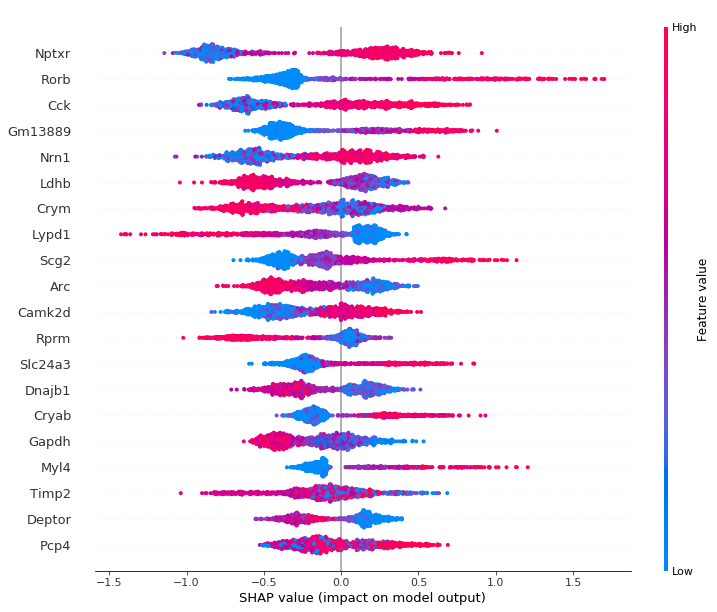

In [15]:
explainer = shap.TreeExplainer(tuned_xgboost)
shap_values = explainer.shap_values(exp1[3])
f = shap.summary_plot(shap_values, exp1[3],show=False)
f = plt.gcf()
f.set_size_inches(12, 10)
f.savefig('AI shap plot seed.png', dpi=300)

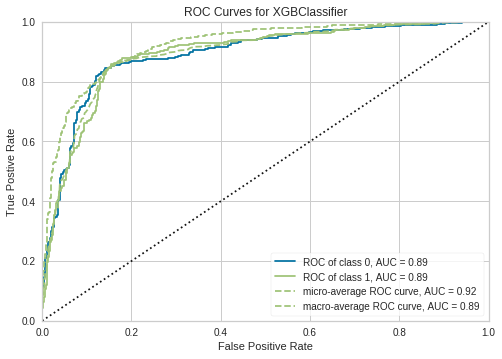

In [232]:
plot_model(tuned_xgboost, plot = 'auc')

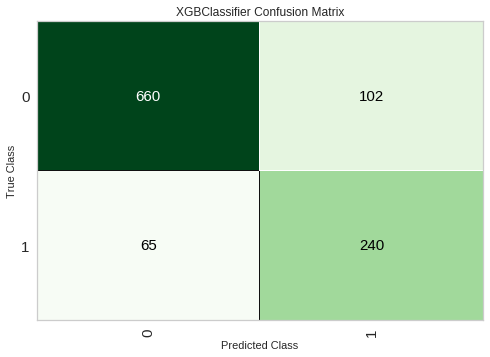

In [46]:
plot_model(tuned_xgboost, plot = 'confusion_matrix')

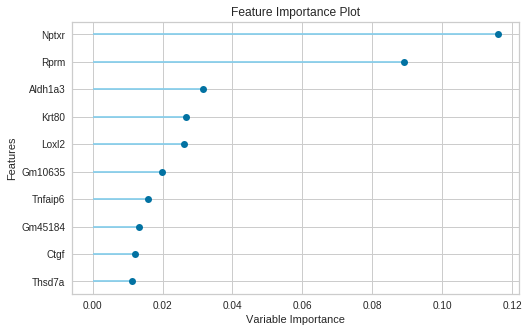

In [52]:
plot_model(tuned_xgboost,plot = 'feature')

In [233]:
predict_model(tuned_xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.8482,0.8917,0.8066,0.7049,0.7523,0.6435


,Npy,Ptgs2,Pbld1,Gm13889,Cplx3,Tshz2,Cyr61,Lypd1,Nr4a2,Dlk1,...,Calm1,Klhl13,Fam83a,Serpine1,Gm17056,Ndrg1,Vstm2b,binary,Label,Score
0,0.000000,1.586067,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.339021,0.0,...,5.100775,0.000000,0.000000,0.0,0.000000,0.000000,1.821211,0,0,0.3078
1,0.000000,0.000000,0.000000,2.424604,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,4.871047,0.904666,0.000000,0.0,0.000000,0.000000,2.122924,0,0,0.3509
2,0.000000,4.526924,0.000000,3.844533,0.000000,0.0,0.000000,0.000000,2.363568,0.0,...,5.214650,0.000000,0.000000,0.0,2.106766,0.000000,2.363568,0,0,0.3100
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.119354,1.119354,0.0,...,5.737963,0.000000,0.000000,0.0,0.000000,0.000000,1.119354,0,1,0.6019
4,0.000000,2.370602,0.000000,1.920197,0.000000,0.0,0.000000,0.000000,1.920197,0.0,...,5.076067,0.000000,0.000000,0.0,1.585460,0.000000,0.000000,0,0,0.3218
5,0.000000,0.000000,0.000000,1.092569,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,5.342823,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1,1,0.5136
6,0.000000,0.000000,0.000000,1.035810,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,5.157053,0.000000,0.000000,0.0,0.000000,1.864416,1.035810,0,0,0.3092
7,0.000000,0.000000,3.426853,0.000000,0.000000,0.0,1.884594,0.000000,0.000000,0.0,...,5.754309,0.000000,0.000000,0.0,1.051251,0.000000,1.051251,1,1,0.5519
8,0.890814,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.669843,0.000000,0.0,...,5.790646,0.000000,0.000000,0.0,0.000000,0.890814,0.000000,0,1,0.6423
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,5.040236,0.000000,0.000000,0.0,1.854138,0.000000,0.000000,0,0,0.3203


In [16]:
save_experiment('Experiment_AI_19July2020')

Experiment Succesfully Saved


In [14]:
from sklearn.model_selection import train_test_split
from pycaret import preprocess
from sklearn import metrics

X = exp1[3]
y = exp1[5]

# Number of random trials
NUM_TRIALS = 10
d = []
for i in range(NUM_TRIALS):
    
    X_train, X_test, y_train, y_test  = train_test_split(X, y,stratify=y, test_size=0.9,  random_state=i)
    pred_ =tuned_xgboost.predict(X_test)
    pred_prob = tuned_xgboost.predict_proba(X_test)[:,1]
    acc = metrics.accuracy_score(y_test,pred_)
    auc = metrics.roc_auc_score(y_test,pred_prob)
    prec = metrics.precision_score(y_test,pred_)
    f1 = metrics.f1_score(y_test,pred_)
    recall = metrics.recall_score(y_test,pred_)
    kappa = metrics.cohen_kappa_score(y_test,pred_)
    d.append(
        {
           'Accuracy' : acc, 'AUC': auc, 'F1' : f1, 'Precision':prec, 'Recall':recall, 'Kappa':kappa
        }
    )
    model_results=pd.DataFrame(d)


In [15]:
model_results

,AUC,Accuracy,F1,Kappa,Precision,Recall
0,0.861279,0.860562,0.422414,0.347623,0.544444,0.345070
1,0.855681,0.861602,0.434043,0.359086,0.548387,0.359155
2,0.864718,0.861602,0.434043,0.359086,0.548387,0.359155
3,0.854125,0.856400,0.405172,0.328149,0.522222,0.330986
4,0.859456,0.858481,0.408696,0.333313,0.534091,0.330986
5,0.854744,0.859521,0.405286,0.331287,0.541176,0.323944
6,0.845423,0.854318,0.385965,0.308931,0.511628,0.309859
7,0.856068,0.857440,0.406926,0.330722,0.528090,0.330986
8,0.859103,0.858481,0.418803,0.342397,0.532609,0.345070
9,0.848175,0.855359,0.398268,0.320952,0.516854,0.323944
